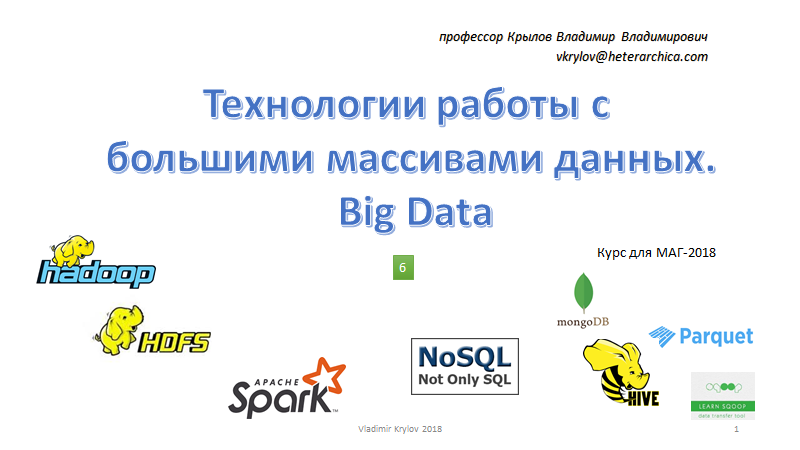

# Машинное обучение в pySpark. Библиотека SparkML

Имеется две библиотеки для разработки программ машинного обучения: SparkMlLib и SparkML. Исторически первая MlLib предоставляет API для большого числа алгоритмов, хотя не столь обширна как Sklearn. Зато она написана для работы с RDD и обеспечивает высокую степень параллелизма при выполнении. Библиотека SparkML работает только со  Spark начиная с версии 1.2 и ее API позволяет работать с Dataframe и Spark Pipeline без привлечения UDF, что безусловно делает ее более перспективной.

### Основные понятия
Spark ML стандартизирует API для алгоритмов машинного обучения, чтобы упростить объединение нескольких алгоритмов в один конвейер или рабочий процесс. В этом разделе рассматриваются ключевые понятия, введенные Spark ML API.

- ML Dataset: Spark ML использует SchemaRDD от Spark SQL в качестве набора данных, который может содержать различные типы данных. Например, в наборе данных могут быть разные столбцы, в которых хранятся тексты, векторы признаков, истинные метки и предсказания.
- Transformer: Transformer - это алгоритм, который может преобразовать один SchemaRDD в другой SchemaRDD. Например, модель ML представляет собой Transformer, который преобразует RDD с функциями в RDD с предсказаниями.

- Estimator: Estimator - это алгоритм, который может быть установлен на SchemaRDD для создания Transformer. Например, алгоритм обучения представляет собой Estimator, который обучается на наборе данных и создает модель.

- Pipeline: Pipeline объединяет несколько Transformer и  Estimator вместе, чтобы указать рабочий процесс ML.

- Param: все Transformer и Estimator имеют общий API для указания параметров.

### Набор данных ML - Dataset ML
Машиннное обучение может применяться к широкому спектру типов данных, таких как векторы, текст, изображения и структурированные данные. Spark ML использует SchemaRDD от Spark SQL для поддержки множества типов данных в рамках единой концепции набора данных.

SchemaRDD поддерживает множество базовых и структурированных типов; 
Numeric types

ByteType: Represents 1-byte signed integer numbers. The range of numbers is from -128 to 127.

ShortType: Represents 2-byte signed integer numbers. The range of numbers is from -32768 to 32767.

IntegerType: Represents 4-byte signed integer numbers. The range of numbers is from -2147483648 to 2147483647.

LongType: Represents 8-byte signed integer numbers. The range of numbers is from -9223372036854775808 to 9223372036854775807.

FloatType: Represents 4-byte single-precision floating point numbers.

DoubleType: Represents 8-byte double-precision floating point numbers.

DecimalType: Represents arbitrary-precision signed decimal numbers. Backed internally by java.math.BigDecimal. A BigDecimal consists of an arbitrary precision integer unscaled value and a 32-bit integer scale.

String type
StringType: Represents character string values.

Binary type
BinaryType: Represents byte sequence values.

Boolean type
BooleanType: Represents boolean values.

Datetime type

TimestampType: Represents values comprising values of fields year, month, day, hour, minute, and second.

DateType: Represents values comprising values of fields year, month, day.

Complex types

ArrayType(elementType, containsNull): Represents values comprising a sequence of elements with the type of elementType. containsNull is used to indicate if elements in a ArrayType value can have null values.
MapType(keyType, valueType, valueContainsNull): Represents values comprising a set of key-value pairs. The data type of keys are described by keyType and the data type of values are described by valueType. For a MapType value, keys are not allowed to have null values. valueContainsNull is used to indicate if values of a MapType value can have null values.
StructType(fields): Represents values with the structure described by a sequence of StructFields (fields).
StructField(name, dataType, nullable): Represents a field in a StructType. The name of a field is indicated by name. The data type of a field is indicated by dataType. nullable is used to indicate if values of this fields can have null values.

В дополнение к типам, перечисленным в руководстве Spark SQL, SchemaRDD может использовать типы ML Vector.

SchemaRDD может быть создан неявно или явно из обычного RDD. 

Столбцы в SchemaRDD являются именованными. В приведенных ниже примерах кода используются такие имена, как «текст», «функции» и «метка».

### ML Algorithms

#### Transformer
Transformer - это абстракция, которая включает в себя функции Transformer и изученных моделей. Технически Transformer реализует метод transform (), который преобразует один SchemaRDD в другой, обычно добавляя один или несколько столбцов. Например:

Трансформатор функций может принимать набор данных, читать столбцы (например, текст), преобразовывать их в новый столбец (например, векторы объектов), добавлять новый столбец в набор данных и выводить обновленный набор данных.
Модель обучения может взять набор данных, прочитать столбец, содержащий векторы признаков, предсказать метку для каждого вектор-функции, добавить метки в качестве нового столбца и вывести обновленный набор данных.

#### Estimator
Estimator абстрагирует понятие алгоритма обучения или любой алгоритм, который подходит или обучает данные. Технически, Estimator реализует метод fit (), который принимает SchemaRDD и производит Transformer. Например, алгоритм обучения, такой как LogisticRegression, является Estimator, а вызов fit () обучает LogisticRegressionModel, который является Transformer.

#### Pipeline
В машинном обучении обычно выполняется последовательность алгоритмов для обработки и изучения данных. Например, простой рабочий процесс обработки текстовых документов может включать несколько этапов:

- Разделите текст каждого документа на слова.
- Преобразуйте слова каждого документа в числовой вектор функции.
- Изучите модель прогнозирования, используя векторы признаков и метки.

Spark ML представляет собой такой рабочий процесс, как Pipeline, который состоит из последовательности PipelineStages (Transformers and Estimators) для запуска в определенном порядке. 

#### Как это работает

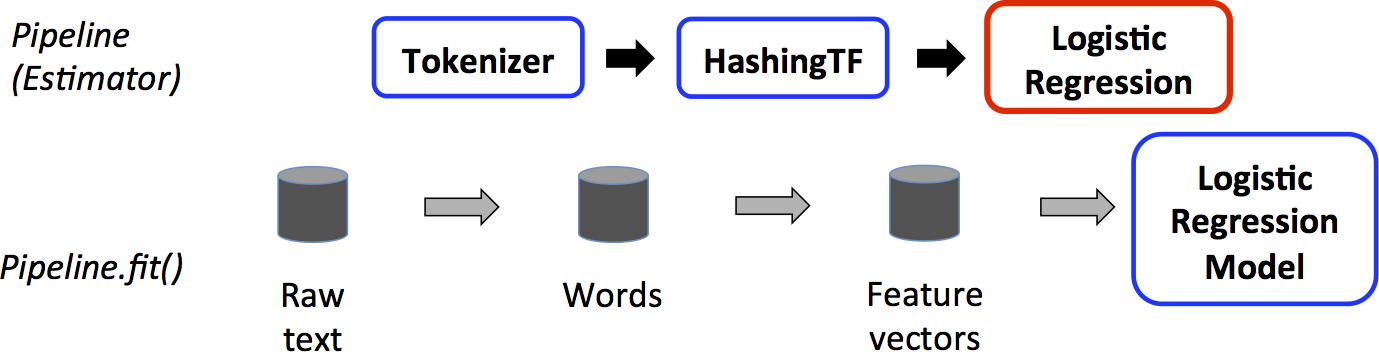

Pipeline указывается как последовательность этапов, и каждый этап является либо Transformer, либо Estimator. Эти этапы выполняются по порядку, и входной набор данных изменяется, когда он проходит через каждый этап. Для этапов трансформатора метод transform () вызывается в наборе данных. Для этапов оценки метод fit () вызывается для создания трансформатора (который становится частью PipelineModel или установленного трубопровода) и что метод transform () Transformer вызывается в наборе данных.

Мы проиллюстрируем это для простого текстового документооборота. На рисунке ниже показано время использования тренинга для трубопровода.

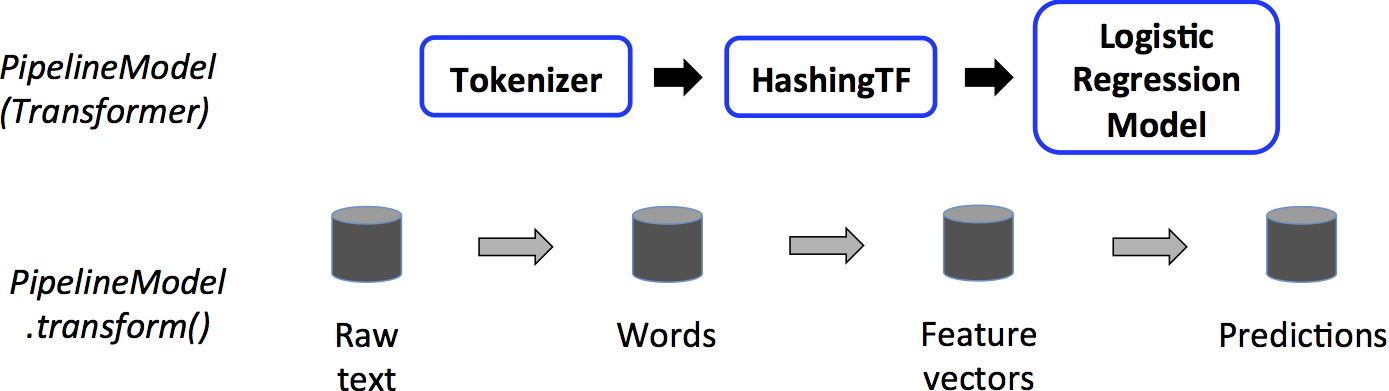

#### Параметры
Estimator и Transformer Spark ML используют единый API для указания параметров.

Param - это именованный параметр с автономной документацией. Параметр ParamMap представляет собой набор пар (параметр, значение).

Существует два основных способа передачи параметров в алгоритм:

Задайте параметры для экземпляра. Например, если lr является экземпляром LogisticRegression, можно было бы вызвать lr.setMaxIter (10), чтобы lr.fit () использовал не более 10 итераций. Этот API напоминает API, используемый в MLlib.
Передайте ParamMap для соответствия () или transform (). Любые параметры в ParamMap будут переопределять параметры, ранее заданные с помощью методов setter.
Параметры относятся к конкретным экземплярам Оценщиков и Трансформаторов. Например, если у нас есть два экземпляра LogisticRegression lr1 и lr2, мы можем построить ParamMap с указанными параметрами maxIter: ParamMap (lr1.maxIter -> 10, lr2.maxIter -> 20). Это полезно, если есть два алгоритма с параметром maxIter в Pipeline.

## Code Examples

### Spam Detection

In [1]:
from pyspark.sql import SparkSession

In [2]:
import sparkmonitor
!jupyter nbextension install sparkmonitor --py --user --symlink 
!jupyter nbextension enable sparkmonitor --py --user            
!jupyter serverextension enable --py --user sparkmonitor
!ipython profile create && echo "c.InteractiveShellApp.extensions.append('sparkmonitor.kernelextension')" >>  $(ipython profile locate default)/ipython_kernel_config.py

Installing /opt/conda/lib/python3.6/site-packages/sparkmonitor/static -> sparkmonitor
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable sparkmonitor --user --py
    
Enabling notebook extension sparkmonitor/module...
      - Validating: OK
Enabling: sparkmonitor.serverextension
- Writing config: /home/jovyan/.jupyter
    - Validating...
      sparkmonitor.serverextension  OK


In [3]:
print(conf.toDebugString())

spark.extraListeners=sparkmonitor.listener.JupyterSparkMonitorListener
spark.driver.extraClassPath=/opt/conda/lib/python3.6/site-packages/sparkmonitor/listener.jar


In [4]:
conf.setAppName('nlpproject')
conf.setMaster('local[*]')
from pyspark import SparkContext
sc=SparkContext.getOrCreate(conf=conf) #Start the spark context

In [5]:
spark = SparkSession.builder.appName('nlpproject').getOrCreate()

In [6]:
data = spark.read.csv('BigData_HSE/SMSSpamCollection',inferSchema=True,sep='\t')

In [7]:
data.show()

+----+--------------------+
| _c0|                 _c1|
+----+--------------------+
| ham|Go until jurong p...|
| ham|Ok lar... Joking ...|
|spam|Free entry in 2 a...|
| ham|U dun say so earl...|
| ham|Nah I don't think...|
|spam|FreeMsg Hey there...|
| ham|Even my brother i...|
| ham|As per your reque...|
|spam|WINNER!! As a val...|
|spam|Had your mobile 1...|
| ham|I'm gonna be home...|
|spam|SIX chances to wi...|
|spam|URGENT! You have ...|
| ham|I've been searchi...|
| ham|I HAVE A DATE ON ...|
|spam|XXXMobileMovieClu...|
| ham|Oh k...i'm watchi...|
| ham|Eh u remember how...|
| ham|Fine if thats th...|
|spam|England v Macedon...|
+----+--------------------+
only showing top 20 rows



In [8]:
data = data.withColumnRenamed('_C0','class').withColumnRenamed('_c1','text')

In [9]:
from pyspark.sql.functions import length

In [10]:
data = data.withColumn('length',length(data['text']))

In [11]:
data.groupBy('class').mean().show()

+-----+-----------------+
|class|      avg(length)|
+-----+-----------------+
|  ham|71.45431945307645|
| spam|138.6706827309237|
+-----+-----------------+



Hm... Look at how the length of the text message differs from ham to spam... This is essentially feature engineering.

In [12]:
from pyspark.ml.feature import Tokenizer,StopWordsRemover,CountVectorizer,IDF,StringIndexer

In [13]:
tokenizer = Tokenizer(inputCol='text',outputCol='token_text')

In [14]:
stop_remove = StopWordsRemover(inputCol='token_text',outputCol='stop_token')

In [15]:
count_vec = CountVectorizer(inputCol='stop_token',outputCol='c_vec')

In [16]:
idf = IDF(inputCol='c_vec',outputCol='tf_idf')

In [17]:
ham_spam_to_numeric = StringIndexer(inputCol='class',outputCol='label')

In [18]:
from pyspark.ml.feature import VectorAssembler

In [19]:
clean_up = VectorAssembler(inputCols=['tf_idf','length'],outputCol='features')


Build the model... Most popular in NLP is naive bayes

In [20]:
from pyspark.ml.classification import NaiveBayes

In [21]:
nb = NaiveBayes()

In [22]:
from pyspark.ml import Pipeline

In [23]:
data_prep_pipe = Pipeline(stages=[ham_spam_to_numeric,tokenizer,stop_remove, count_vec,idf,clean_up])

In [24]:
cleaner = data_prep_pipe.fit(data)

In [25]:
clean_data = cleaner.transform(data)

In [26]:
clean_data.columns

['class',
 'text',
 'length',
 'label',
 'token_text',
 'stop_token',
 'c_vec',
 'tf_idf',
 'features']

In [27]:
clean_data = clean_data.select('label','features')

In [28]:
clean_data.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(13424,[7,11,31,6...|
|  0.0|(13424,[0,24,297,...|
|  1.0|(13424,[2,13,19,3...|
|  0.0|(13424,[0,70,80,1...|
|  0.0|(13424,[36,134,31...|
|  1.0|(13424,[10,60,139...|
|  0.0|(13424,[10,53,103...|
|  0.0|(13424,[125,184,4...|
|  1.0|(13424,[1,47,118,...|
|  1.0|(13424,[0,1,13,27...|
|  0.0|(13424,[18,43,120...|
|  1.0|(13424,[8,17,37,8...|
|  1.0|(13424,[13,30,47,...|
|  0.0|(13424,[39,96,217...|
|  0.0|(13424,[552,1697,...|
|  1.0|(13424,[30,109,11...|
|  0.0|(13424,[82,214,47...|
|  0.0|(13424,[0,2,49,13...|
|  0.0|(13424,[0,74,105,...|
|  1.0|(13424,[4,30,33,5...|
+-----+--------------------+
only showing top 20 rows



In [29]:
training,test = clean_data.randomSplit([0.7,0.3])

In [30]:
spam_detector = nb.fit(training)

In [31]:
data.printSchema()

root
 |-- class: string (nullable = true)
 |-- text: string (nullable = true)
 |-- length: integer (nullable = true)



In [32]:
test_results = spam_detector.transform(test)

In [33]:
test_results.show()

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|(13424,[0,1,2,13,...|[-603.42746310124...|[1.0,1.4947874893...|       0.0|
|  0.0|(13424,[0,1,4,50,...|[-826.89950095048...|[1.0,2.3476099179...|       0.0|
|  0.0|(13424,[0,1,5,15,...|[-1004.1440471594...|[1.0,1.0668296090...|       0.0|
|  0.0|(13424,[0,1,7,8,1...|[-876.74003930471...|[1.0,1.5304866939...|       0.0|
|  0.0|(13424,[0,1,7,15,...|[-658.95824899894...|[1.0,9.9915229227...|       0.0|
|  0.0|(13424,[0,1,9,14,...|[-539.35910651099...|[1.0,2.1643142949...|       0.0|
|  0.0|(13424,[0,1,11,32...|[-868.09772874117...|[1.0,1.5556622250...|       0.0|
|  0.0|(13424,[0,1,14,18...|[-1380.1581074302...|[1.0,1.6595397754...|       0.0|
|  0.0|(13424,[0,1,14,78...|[-691.09936753171...|[1.0,1.1876384624...|       0.0|
|  0.0|(13424,[0

In [34]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [35]:
acc_eval = MulticlassClassificationEvaluator()

In [36]:
acc = acc_eval.evaluate(test_results)

In [37]:
print('Acc of NB Model')
print(acc)

Acc of NB Model
0.9243536921499502


Approx 92% accuracy whether something is spam or ham.

### Прогнозирование оттка клиентов методом Logistic Regression

In [38]:
data = spark.read.csv('BigData_HSE/customer_churn.csv',inferSchema=True,header=True)

In [39]:
data.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: timestamp (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Churn: integer (nullable = true)



In [40]:
data.describe().show()

+-------+-------------+-----------------+-----------------+------------------+-----------------+------------------+--------------------+--------------------+-------------------+
|summary|        Names|              Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|            Location|             Company|              Churn|
+-------+-------------+-----------------+-----------------+------------------+-----------------+------------------+--------------------+--------------------+-------------------+
|  count|          900|              900|              900|               900|              900|               900|                 900|                 900|                900|
|   mean|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|                null|                null|0.16666666666666666|
| stddev|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.764835592035

In [41]:
data.columns

['Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Onboard_date',
 'Location',
 'Company',
 'Churn']

In [42]:
from pyspark.ml.feature import VectorAssembler

In [43]:
assembler = VectorAssembler(inputCols=['Age','Total_Purchase','Account_Manager','Years','Num_Sites'],outputCol='features')

In [44]:
output = assembler.transform(data)

In [45]:
final_data = output.select('features','churn')

In [46]:
train_churn, test_churn = final_data.randomSplit([0.7,0.3])

In [47]:
from pyspark.ml.classification import LogisticRegression

In [48]:
lr_churn = LogisticRegression(labelCol='churn')

In [49]:
fitted_churn_model = lr_churn.fit(train_churn)

In [50]:
training_sum = fitted_churn_model.summary

In [51]:
training_sum.predictions.describe().show()

+-------+-------------------+-------------------+
|summary|              churn|         prediction|
+-------+-------------------+-------------------+
|  count|                644|                644|
|   mean|0.16614906832298137|0.12888198757763975|
| stddev|0.37250371774620583| 0.3353297280094141|
|    min|                0.0|                0.0|
|    max|                1.0|                1.0|
+-------+-------------------+-------------------+



In [52]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [53]:
pred_and_labels = fitted_churn_model.evaluate(test_churn)

In [54]:
pred_and_labels.predictions.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|churn|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[27.0,8628.8,1.0,...|    0|[5.49567396917748...|[0.99591228873298...|       0.0|
|[28.0,8670.98,0.0...|    0|[7.95842114000755...|[0.99965041743394...|       0.0|
|[29.0,8688.17,1.0...|    1|[2.59407483359806...|[0.93047927113761...|       0.0|
|[29.0,9378.24,0.0...|    0|[4.87124234264639...|[0.99239444945117...|       0.0|
|[29.0,9617.59,0.0...|    0|[4.62031716146812...|[0.99024639814604...|       0.0|
|[30.0,8677.28,1.0...|    0|[4.42868690042639...|[0.98821050551675...|       0.0|
|[31.0,5387.75,0.0...|    0|[2.57474277846545...|[0.92921827212041...|       0.0|
|[31.0,8688.21,0.0...|    0|[6.67507784117326...|[0.99873961622353...|       0.0|
|[31.0,11743.24,0....|    0|[7.22625696042949...|[0.99927329063541...|       0.0|
|[32.0,5756.12,0

In [55]:
churn_eval = BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='churn')

In [56]:
auc = churn_eval.evaluate(pred_and_labels.predictions)

In [57]:
auc

0.7858936565127197

In [58]:
final_lr_model = lr_churn.fit(final_data)

In [59]:
new_customers = spark.read.csv('BigData_HSE/new_customers.csv',inferSchema=True,header=True)

In [60]:
new_customers.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: timestamp (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)



In [61]:
test_new_customers = assembler.transform(new_customers)

In [62]:
test_new_customers.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: timestamp (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- features: vector (nullable = true)



In [63]:
final_results = final_lr_model.transform(test_new_customers)

In [64]:
final_results.show()

+--------------+----+--------------+---------------+-----+---------+-------------------+--------------------+----------------+--------------------+--------------------+--------------------+----------+
|         Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|       Onboard_date|            Location|         Company|            features|       rawPrediction|         probability|prediction|
+--------------+----+--------------+---------------+-----+---------+-------------------+--------------------+----------------+--------------------+--------------------+--------------------+----------+
| Andrew Mccall|37.0|       9935.53|              1| 7.71|      8.0|2011-08-29 18:37:54|38612 Johnny Stra...|        King Ltd|[37.0,9935.53,1.0...|[2.22168705251440...|[0.90218018099704...|       0.0|
|Michele Wright|23.0|       7526.94|              1| 9.28|     15.0|2013-07-22 18:19:54|21083 Nicole Junc...|   Cannon-Benson|[23.0,7526.94,1.0...|[-6.2207530595020...|[0.00198380445828...|       

In [65]:
final_results.select('Company','prediction').show()

+----------------+----------+
|         Company|prediction|
+----------------+----------+
|        King Ltd|       0.0|
|   Cannon-Benson|       1.0|
|Barron-Robertson|       1.0|
|   Sexton-Golden|       1.0|
|        Wood LLC|       0.0|
|   Parks-Robbins|       1.0|
+----------------+----------+



In [66]:
test_new_customers.describe().show()

+-------+-------------+------------------+-----------------+------------------+-----------------+------------------+--------------------+----------------+
|summary|        Names|               Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|            Location|         Company|
+-------+-------------+------------------+-----------------+------------------+-----------------+------------------+--------------------+----------------+
|  count|            6|                 6|                6|                 6|                6|                 6|                   6|               6|
|   mean|         null|35.166666666666664|7607.156666666667|0.8333333333333334|6.808333333333334|12.333333333333334|                null|            null|
| stddev|         null| 15.71517313511584|4346.008232825459| 0.408248290463863|3.708737880555414|3.3862466931200785|                null|            null|
|    min|Andrew Mccall|              22.0|            100.0|          

These are the customers we expect to churn.

https://spark.apache.org/docs/1.2.2/ml-guide.html#ml-dataset 